In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [20]:
image_size = 256
batch_size  = 32
channels = 3
Epochs = 50 # Pura training data 50 dafa dekh lo aur har baar better hona

In [21]:
#loading data from folders
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (image_size, image_size),
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [22]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [23]:
#number of batches
len(dataset)

68

In [24]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape) # will return Shape(batch size, pic size, Channels(RGB) )
    print(label_batch.numpy()) # 0 = Early blight, 1 = late blight, 2 = healthy


(32, 256, 256, 3)
[0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 2 0 2 0 1]


In [25]:
#tensor converted to numpy(matrix)
for image_batch, label_batch in dataset.take(1):
    print(image_batch.numpy()) # Pehle batch ki sabhi images ko NumPy array mein convert karke print karo

[[[[175. 173. 186.]
   [176. 174. 187.]
   [177. 175. 188.]
   ...
   [180. 178. 192.]
   [183. 180. 197.]
   [188. 185. 202.]]

  [[171. 169. 182.]
   [173. 171. 184.]
   [174. 172. 185.]
   ...
   [184. 182. 196.]
   [185. 182. 199.]
   [190. 187. 204.]]

  [[169. 167. 180.]
   [169. 167. 180.]
   [171. 169. 182.]
   ...
   [186. 184. 197.]
   [184. 182. 196.]
   [187. 185. 199.]]

  ...

  [[136. 134. 145.]
   [139. 137. 148.]
   [131. 129. 140.]
   ...
   [151. 148. 157.]
   [145. 142. 151.]
   [132. 129. 138.]]

  [[146. 144. 155.]
   [147. 145. 156.]
   [138. 136. 147.]
   ...
   [156. 153. 162.]
   [149. 146. 155.]
   [134. 131. 140.]]

  [[151. 149. 160.]
   [152. 150. 161.]
   [141. 139. 150.]
   ...
   [150. 147. 156.]
   [157. 154. 163.]
   [154. 151. 160.]]]


 [[[112.  84.  83.]
   [164. 136. 135.]
   [107.  79.  78.]
   ...
   [171. 151. 150.]
   [165. 145. 144.]
   [188. 168. 167.]]

  [[ 87.  59.  58.]
   [132. 104. 103.]
   [140. 112. 111.]
   ...
   [177. 157. 156.]
 

In [26]:
# tensor = TensorFlow world ka data 
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) # Show the raw tensor (pixel data) of the first image from each of the first 2 batches


tf.Tensor(
[[[174. 172. 183.]
  [178. 176. 187.]
  [176. 174. 185.]
  ...
  [167. 169. 181.]
  [204. 206. 218.]
  [199. 201. 213.]]

 [[173. 171. 182.]
  [176. 174. 185.]
  [176. 174. 185.]
  ...
  [189. 191. 203.]
  [197. 199. 211.]
  [188. 190. 202.]]

 [[163. 161. 172.]
  [165. 163. 174.]
  [171. 169. 180.]
  ...
  [190. 192. 204.]
  [181. 183. 195.]
  [174. 176. 188.]]

 ...

 [[132. 126. 136.]
  [143. 137. 147.]
  [131. 125. 135.]
  ...
  [137. 134. 145.]
  [136. 133. 144.]
  [146. 143. 154.]]

 [[134. 128. 138.]
  [149. 143. 153.]
  [144. 138. 148.]
  ...
  [146. 143. 154.]
  [143. 140. 151.]
  [151. 148. 159.]]

 [[155. 149. 159.]
  [159. 153. 163.]
  [137. 131. 141.]
  ...
  [138. 135. 146.]
  [132. 129. 140.]
  [136. 133. 144.]]], shape=(256, 256, 3), dtype=float32)


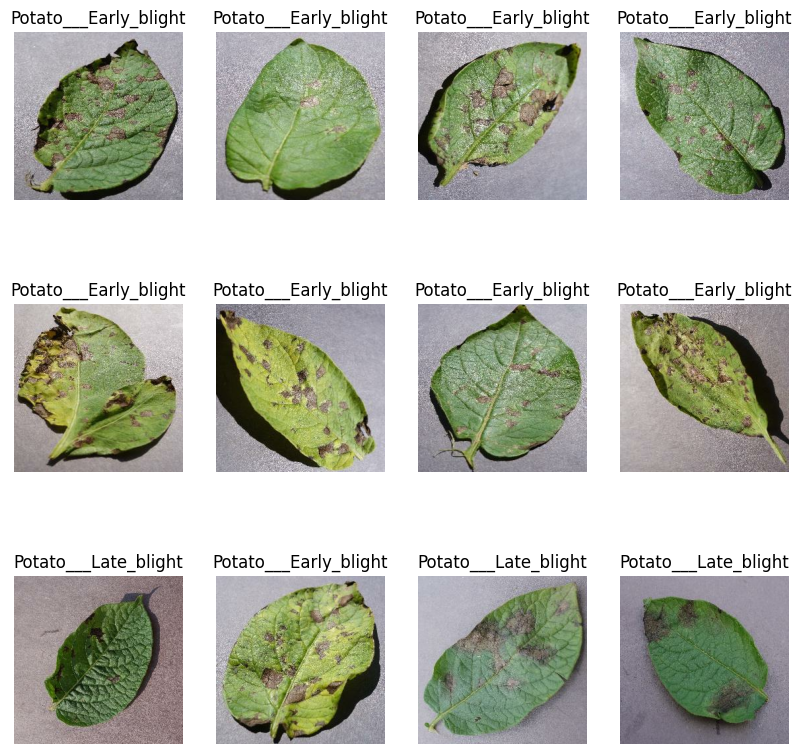

In [27]:
# displaying/Extracting images in a loop
plt.figure(figsize=(10,10)) # 10x10 inch ka canvas banao jisme images ya plots draw honge
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #showing image, args -> numpy array in integer format
        plt.title( class_names[label_batch[i]]) # Displaying title dynamically with class names and label batch
        plt.axis("off") # removing axis
    

In [28]:
# Collect -> train -> validate -> test

In [29]:
#train test split assumptions
# 80% ==> Training
# 10% ==> Validation, 10% ==> Test

In [30]:
#size of train dataset
train_size = 0.8
len(dataset)*0.8 #lenght of data set is 68, means there are 60 batches

54.400000000000006

In [31]:
#size of Validation dataset
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [32]:
#Splitting Dataset into Training Validation and Test Dataset
train_ds = dataset.take(54) # get the train set by taking 54 batches
remain = dataset.skip(54) # remaining are test data

val_ds = remain.take(6) # 6 batches are for validation from test data, as val_size = 0.1 => 6 batches
test_ds = remain.skip(6) # remaining data is for testing dataset

In [33]:
# Making a function like train-test split for splitting dataset dynamically
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)  # Seed lagane se randomness same tarah repeat hoti hai (testing/debug ke liye)

    # Getting sizes
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    # Extracting datasets
    train_ds = ds.take(train_size)  # Training size jitna data nikal do
    val_ds = ds.skip(train_size).take(val_size)  # Training data skip karo, phir validation size jitna data nikal do
    test_ds = ds.skip(train_size + val_size)  # Training + validation data skip karo, baaki test mein chala jaega

    return train_ds, val_ds, test_ds


In [34]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [35]:
len(train_ds)

54

In [36]:
len(val_ds)

6

In [37]:
len(test_ds)

8

In [38]:
# cache()    =>  Ek dafa RAM/Disk mein rakh lo (fast access)
# shuffle()  =>  Data ko mix kar lo (random order)
# prefetch() =>  Next batch pehle se load karke rakho (no wait time)
# Cache karo, mix karo, aur future ke liye tayyar raho!
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
# Preprocessing
resize_and_rescale = tf.keras.Sequential([
    # Resize image to (image_size x image_size)
    layers.Resizing(image_size, image_size),
     # Normalize pixel values from [0, 255] to [0, 1]
    layers.Rescaling(1.0/255)
])

In [40]:
data_augmentation = tf.keras.Sequential([
     # Randomly flip image (left-right + up-down)
    layers.RandomFlip("horizontal_and_vertical"),
    # Randomly rotate image by 20%
    layers.RandomRotation(0.2),
])

In [42]:
# ---------------- Convolutional Neural Network (CNN) for Potato Disease Detection Architecture ------------------

# Input image shape: (batch size, height, width, channels)
input_shape = (batch_size, image_size, image_size, channels)

# Number of output classes: Early Blight, Late Blight, Healthy
n_classes = 3

# Creating a Sequential CNN Model: Layers run in order, one after another
model = models.Sequential([

    # Step 1: Resize and normalize images (0-255 → 0-1)
    resize_and_rescale,

    # Step 2: Random flips, rotations, etc. for better learning (Data Augmentation)
    data_augmentation,

    # ------------------- Convolutional + Pooling Layers -------------------

    # Layer 1: Detect basic features like lines, corners, spots
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    # Reduce image size, keep important features only
    layers.MaxPooling2D((2,2)),

    # Layer 2: Learn deeper features, more complex patterns
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Layer 3: Detect disease-specific shapes, leaf damage, etc.
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Layer 4: Even deeper understanding of affected areas
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Layer 5: More filters = better feature detection power
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Layer 6: Final deep-level features captured here
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # ------------------- Fully Connected Layers -------------------

    # Flatten: Convert all image features into a long 1D list (vector)
    layers.Flatten(),

    # Dense Layer: Neural network layer that "thinks" and finds patterns
    layers.Dense(64, activation='relu'),  # ReLU makes learning faster and smarter

    # Output Layer: Predict which class (0 = Early, 1 = Late, 2 = Healthy)
    layers.Dense(n_classes, activation='softmax'),  # Gives probabilities for each class
])

# Build the model with the defined input shape
model.build(input_shape=input_shape)


In [43]:
model.summary() #x-ray of neural network

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile the CNN model for training
model.compile(

    # Adam optimizer: helps model learn efficiently
    optimizer = 'adam',

    # Loss function for multi-class integer labels (0,1,2)
    # from_logits=False since softmax is already applied in the last layer
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),

    # Track accuracy during training
    metrics = ['accuracy']
)


In [33]:
#Model Fitting
history = model.fit(
    train_ds,
    epochs = Epochs,
    batch_size = batch_size,
    verbose = 1, # Display training (Epoch) info
    validation_data = val_ds 
)

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4658 - loss: 0.9297 - val_accuracy: 0.6406 - val_loss: 0.8672
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.7456 - loss: 0.6314 - val_accuracy: 0.8125 - val_loss: 0.4334
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8352 - loss: 0.3842 - val_accuracy: 0.8854 - val_loss: 0.3050
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8751 - loss: 0.3141 - val_accuracy: 0.8438 - val_loss: 0.3309
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.8746 - loss: 0.2882 - val_accuracy: 0.9062 - val_loss: 0.2726
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8993 - loss: 0.2500 - val_accuracy: 0.9010 - val_loss: 0.2649
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9269 - loss: 0.2046 - val_accuracy: 0.8177 - val_loss: 0.7375
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9017 - loss: 0.2536 - val_accuracy: 0.9167 - va

Text(0.5, 1.0, 'Training vs Validation Loss')

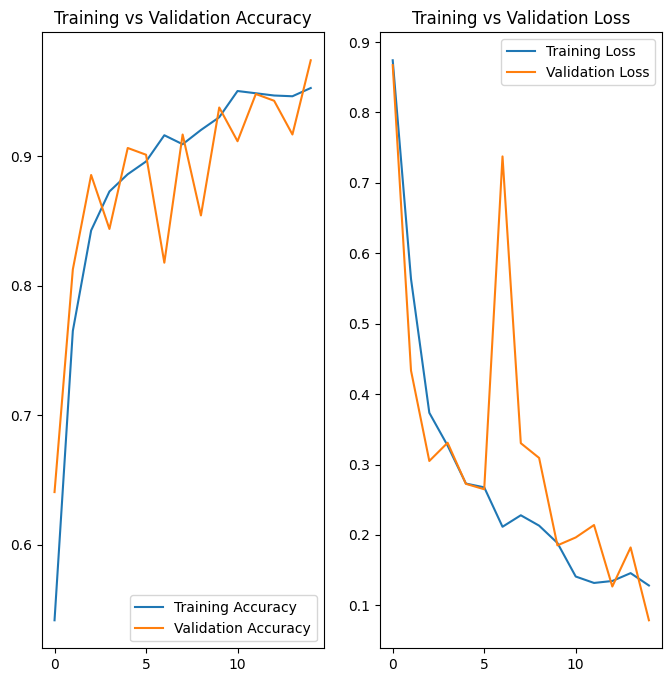

In [35]:
#History => Training history of each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Graph Building
plt.figure(figsize = (8,8)) #Canvas

#Accuracy
plt.subplot(1,2,1) # 1 row, 2 columns → pehla graph (left side)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

#Loss 
plt.subplot(1,2,2) # 1 row, 2 columns → dosra graph (right side)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [30]:
scores = model.evaluate(test_ds)
scores

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 368ms/step - accuracy: 0.9674 - loss: 0.1128


[0.11689804494380951, 0.95703125]

First image to predict
Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted label: Potato___Late_blight


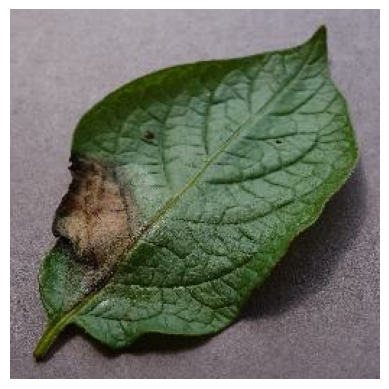

In [43]:
import numpy as np

# Take one batch of images and labels from the test dataset
for images_batch, label_batch in test_ds.take(1):

    # Get the first image from the batch and convert it to a displayable format (uint8)
    first_image = images_batch[0].numpy().astype('uint8')

    # Get the actual label (class index) of that first image
    first_label = label_batch[0].numpy()

    # Show the image that we are going to make a prediction on
    print("First image to predict")
    plt.imshow(first_image)
    plt.axis('off')  # Hide axes for a cleaner display

    # Print the actual class name using class_names list
    print("Actual label:", class_names[first_label])
    
    # Use the model to predict the classes of all images in the batch
    batch_prediction = model.predict(images_batch)

    # Get the predicted class for the first image in the batch
    # np.argmax finds the index of the highest predicted probability
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])



In [39]:
# ----------------------------
# Function to Predict One Image
# ----------------------------
def predict(model, img):
    # Convert the input image (Tensor) to a Numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    
    # Add batch dimension: model expects shape (1, height, width, channels)
    img_array = tf.expand_dims(img_array, 0)  # Shape becomes (1, H, W, C)

    # Make prediction
    predictions = model.predict(img_array)

    # Get the class with highest probability
    predicted_class = class_names[np.argmax(predictions[0])]

    # Calculate confidence percentage
    confidence = round(100 * np.max(predictions[0]), 2)

    # Return both predicted label and confidence
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


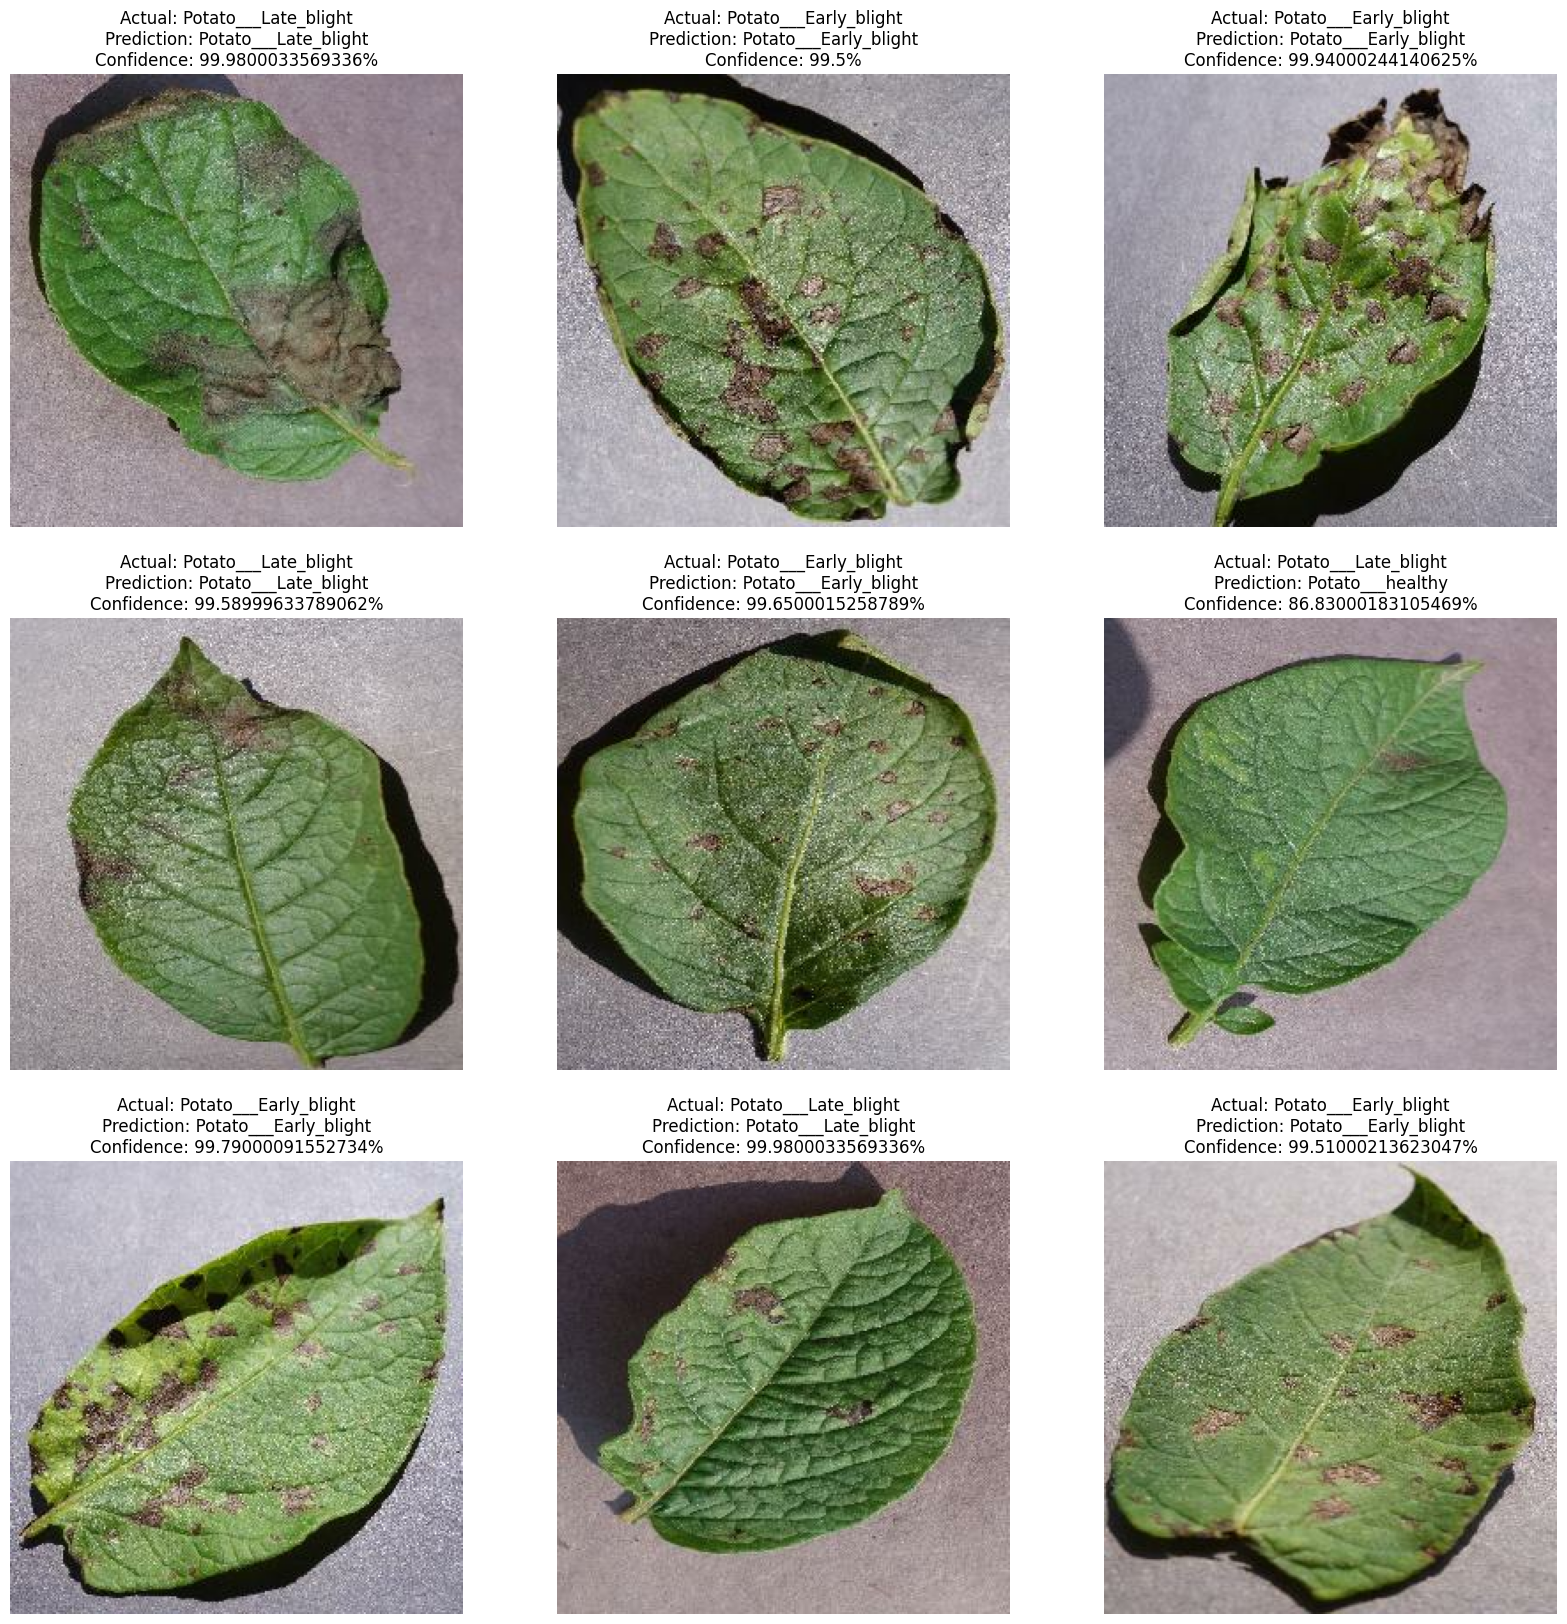

In [44]:
# Display 9 test images with model predictions
plt.figure(figsize=(20, 20))  # Make a big 15x15 inch canvas

for images, labels in test_ds.take(1):  # Take 1 batch from test dataset
    for i in range(9):  # Loop through first 9 images
        ax = plt.subplot(3, 3, i + 1)  # Create a grid: 3 rows × 3 columns
        
        # Show image (convert from tensor to proper display format)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Predict the class of the image (Tensor passed directly)
        predicted_class, confidence = predict(model, images[i])
        
        # Get the actual class name (convert label Tensor to int)
        actual_class = class_names[labels[i].numpy()]
        
        # Title showing actual vs predicted class and confidence %
        plt.title(f"Actual: {actual_class}\nPrediction: {predicted_class}\nConfidence: {confidence}%")
        
        # Hide the axis ticks and border
        plt.axis("off")


In [41]:
import os

# Make sure the 'models' folder exists
os.makedirs("../models", exist_ok=True)

# Check existing model files and get next version number
model_version = max([int(i.replace('.keras', '')) for i in os.listdir("../models") if i.endswith('.keras')] + [0]) + 1

# Save model in Keras format (e.g., 1.keras, 2.keras, ...)
model.save(f"../models/{model_version}.keras")


In [42]:
#Converting .Keras into SavedModel format through filing, only run 1 time after making every model.

import os
from tensorflow import keras

# Paths
source_dir = "../models"
export_base_dir = "../saved_models"

# Ensure export folder exists
os.makedirs(export_base_dir, exist_ok=True)

# Loop through all .keras models in source directory
for file in os.listdir(source_dir):
    if file.endswith(".keras"):
        model_path = os.path.join(source_dir, file)
        version = file.replace(".keras", "")
        
        if not version.isdigit():
            print(f"⏭️ Skipping invalid file: {file}")
            continue
        
        export_path = os.path.join(export_base_dir, version)
        
        # Load and export the model
        print(f"📦 Converting {file} to SavedModel format...")
        model = keras.models.load_model(model_path)
        model.export(export_path)
        print(f"✅ Exported to: {export_path}")

print("🎉 All models converted successfully!")


📦 Converting 1.keras to SavedModel format...
INFO:tensorflow:Assets written to: ../saved_models\1\assets


INFO:tensorflow:Assets written to: ../saved_models\1\assets


Saved artifact at '../saved_models\1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2011107387600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011107692560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011107998384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011107994160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011107993104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011090984224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011090990560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011090991264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011090990384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011091182416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2011091187520: TensorSpec(shape=

In [18]:
# ✅ Import Libraries
import tensorflow as tf
from keras.layers import TFSMLayer  # For Keras 3
import numpy as np
import os

# ✅ Constants
image_size = 256
batch_size = 32
class_names = ["Early Blight", "Late Blight", "Healthy"]

# ✅ Load Dataset (for testing only one image)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size
)

# ✅ Get one batch of images and labels
for images, labels in dataset.take(1):
    test_image = images[0].numpy()
    test_batch = np.expand_dims(test_image, axis=0)  # shape (1, 256, 256, 3)
    break

# ✅ Show actual label
print(f"🎯 True Label (from dataset): {class_names[labels[0]]}")

# ✅ Predict using each of the three SavedModel-format models
for i in range(1, 4):
    model_path = f"../saved_models/{i}"
    if os.path.exists(model_path):
        print(f"\n🔍 Loading SavedModel {i} from {model_path} using TFSMLayer...")
        try:
            # Load as inference-only model
            inference_layer = TFSMLayer(model_path, call_endpoint="serving_default")
            prediction = inference_layer(test_batch)[0].numpy()
            predicted_class = class_names[np.argmax(prediction)]
            print(f"🔢 Prediction Probabilities: {prediction}")
            print(f"✅ Predicted Class by Model {i}: {predicted_class}")
        except Exception as e:
            print(f"⚠️ Error loading model {i}: {e}")
    else:
        print(f"❌ Model {i} not found at {model_path}")


Found 2152 files belonging to 3 classes.
🎯 True Label (from dataset): Late Blight

🔍 Loading SavedModel 1 from ../saved_models/1 using TFSMLayer...
⚠️ Error loading model 1: 0

🔍 Loading SavedModel 2 from ../saved_models/2 using TFSMLayer...
⚠️ Error loading model 2: 0

🔍 Loading SavedModel 3 from ../saved_models/3 using TFSMLayer...
⚠️ Error loading model 3: 0
